<a href="https://colab.research.google.com/github/ordevoir/Data_Analysis/blob/main/Random_Variables_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Случайные величины

**Случайная величина** (*random variable*) представляет собой переменную, которая в результате испытаний принимает одно из возможных значений, наперед не известное и зависящее от случайных причин, которые заранее не могут быть учтены.

**Дискретная** (*discrete*) случайная величина принимает изолированные значения, в то время как **непрерывная** (*continuous*) случайная величина принимает значения из некоторого непрерывного конечного или бесконечного промежутка.

**Законом распределения дискретной случайной величины** называется соответствие между возможными значениями и их вероятностями.

## Дискретная случайная величина

### Распределение вероятностей <img id='distribution'>

Сформируем дискретную случайную величину, определив множество возможных значений и вероятности их выпадения в массивах `X` и `p`. Соответствие между элементами `X` и `p` определяют закон распределения данной случайной величины. Сумма всех вероятностей в `p`, очевидно, должна равняться 1, так как при любом испытании вероятность выпадения одного из возможных значений `X` равна 1. Данная случайная величина имеет 9 возможных значений. Значение `p[i]` определяет вероятность выпадения значения `X[i]`.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-3, -2, -1, 0, 1, 2, 3, 4, 5])
p = np.array([0.05, 0.06, 0.13, 0.24, 0.06, 0.15, 0.14, 0.08, 0.09])

print(f"{len(X) = }, {len(p) = }, {sum(p) = }")

len(X) = 9, len(p) = 9, sum(p) = 1.0


Визуализируем **распределение вероятностей** (*Probability Distribution*):

Text(0, 0.5, 'probabilities')

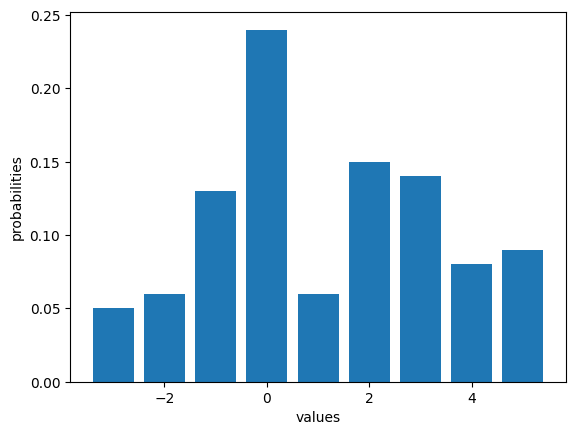

In [3]:
plt.bar(X, p)
plt.xlabel('values')
plt.ylabel('probabilities')

### Выборка <img id="discrete-sample">

Если бы проивзодилось множество испытаний заданной случайной величины, то мы получили бы последовательность, сотоящую из значений, которые может принимать случайная величина. В статистике такой набор значений случайной величины называется **выборкой** (*sample*). Отдельные элементы выборки называются **образцами** (*examples*). Произведем 100000 испытаний. Для генерации воспользуемся функцией `choice()`:
- первым аргументом подается массив из возможных значений;
- вторым аргументом определяется размер выборки;
- в именованный аргумент `p` передается массив вероятностей.

In [35]:
sample_discrete = np.random.choice(X, 100000, p=p)
print(len(sample_discrete))     # размер выборки
print(sample_discrete[:16])     # первые 16 значений

100000
[ 3  0  0 -2  0  3  5 -1  0  0  2 -3  5 -3 -2  4]


Заметим, что значения берутся из массива `X` и естественно, что эти значения повторяются в выборке. Частота появления того или иного значения в выборке определяется его вероятностью.

### Функция вероятности **PMF**
Функцию, которая возвращает вероятность того, что дискретная случайная величина $X$ примет *определенное* значение $n$ называется **функцией вероятности** (*Probability Mass Function* - PMF):

In [6]:
def pmf(n, X, p):
    index = None
    for i in range(len(X)):
        if X[i] == n:
            index = i
            break
    return 0 if index is None else p[index]

pmf(-1, X, p)   # вероятность выпадения значения -1

0.13

### Функция распределения **CDF**

**Функцией распределения** (*Cumulative Distribution Function* - CDF) случайной величины называется функция $F(x)$, определяющая вероятность того, что случайная величина $X$ в результате испытаний примет значение, *меньшее*, чем $x$. Функция распределения, очевидно, является монотонной неубывающей функцией.

Определим функцию `cdf()`, которая по заданному `x` возвращает значение функции распределения данной случайной величины.

In [8]:
def cdf(x, X, p):
    probability = 0
    for i in range(len(X)):
        if X[i] < x:
            probability += p[i]
    return probability

# вероятность выпадения значения, меньшего, чем 5
cdf(5, X, p)

0.91

Визуализируем функцию распределения. 

values = array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])
cdf_sequence = array([0.  , 0.  , 0.  , 0.05, 0.11, 0.24, 0.48, 0.54, 0.69, 0.83, 0.91,
       1.  , 1.  , 1.  ])


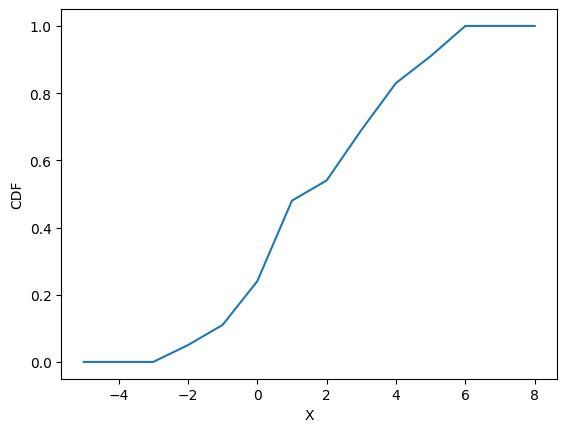

In [9]:
values = np.arange(-5, 9)
cdf_sequence = np.zeros(14)

for i in range(len(values)):
    c = cdf(values[i], X, p)
    cdf_sequence[i] = c

plt.plot(values, cdf_sequence)
plt.xlabel("X")
plt.ylabel("CDF")
print(f"{values = }\n{cdf_sequence = }")

Заметим, что для дискретной случайной величины функция распределения не является гладкой.
> Вероятность $p$ того, что случайная величина примет значение, лежащее на отрезке $[a, b]$, равна приращению функции распределения на этом интервале:
>$$
p(a \leq X \leq b) = F(a) - F(b)
$$

## Непрерывная случайная величина

Функция распределения непрерывной случайной величины может быть гладкой, и в общем случае является кусочно-дифференцируемой. В отличие от дискретного случая, функция распределения непрерывной случайной величины определена не некоторой непрерывной области.

Пусть функция распределения задана сигмоидой c $\alpha = 0.1$. В этом случае функция распределения определена на всей числовой прямой, и является всюду дифференцируемой.

Визуализируем фукнцию распределения на отрезке $[-100, 100]$:

Text(0, 0.5, 'CDF')

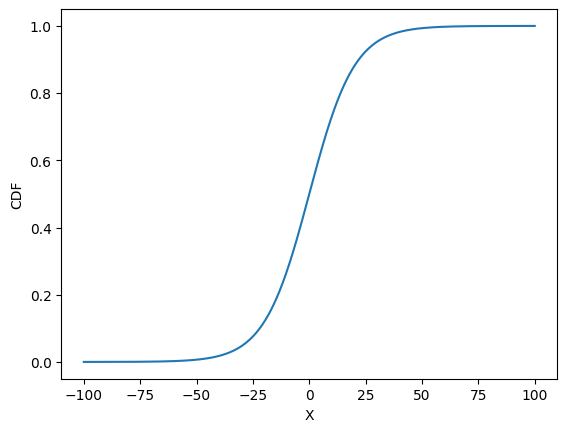

In [13]:
def sigmoid(x, alpha=0.1):
    return 1 / (1 + np.exp(-alpha * x))

segment = np.linspace(-100, 100, 1000)
cdf_sequence = np.zeros_like(segment)

for i in range(len(segment)):
    cdf_sequence[i] = sigmoid(segment[i])

plt.plot(segment, cdf_sequence)
plt.xlabel('X')
plt.ylabel('CDF')

### Плотность вероятности **PDF**

Когда мы имеем дело с непрерывной случайной величиной, определенной на некотором открытом или закрытом промежуте, то вероятность выпадения определенного значения равна нулю. Поэтому вместо распределения вероятностей для задания закона распределения случайной величины используется **плотность вероятности** (*Probability Density Function* - PDF), которая определяет вероятность выпадения значений, лежащих в некотором диапозоне. 

Функция плотности вероятности $f(x)$ может быть задана явно, но если известна функция распределения $F(x)$, плотность вероятности может быть получена как производная от функции распределения:
$$
f(x) = \frac{dF}{dx}
$$

Напишем функцию `deriv_sigmoid`, которая возвращает значение производной сигмоиды в точе `x`. Тогда мы сможем получить значения плотности вероятности на рассматриваемом отрезке `segment`:

Text(0, 0.5, 'PDF')

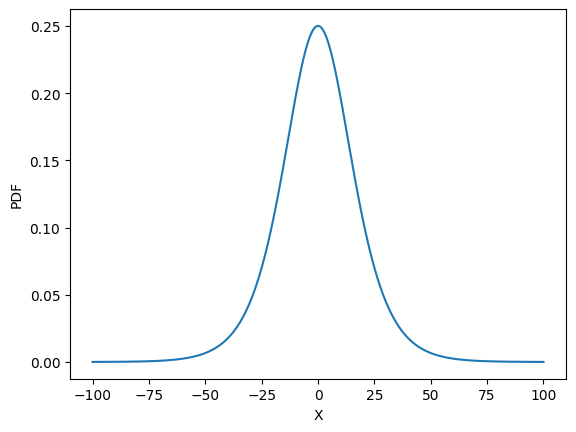

In [14]:
def deriv_sigmoid(x, alpha=0.1):
    return sigmoid(x, alpha) * (1 - sigmoid(x, alpha))

pdf = deriv_sigmoid

pdf = np.zeros_like(segment)
for i in range(len(segment)):
    pdf[i] = deriv_sigmoid(segment[i])

plt.plot(segment, pdf)
plt.xlabel('X')
plt.ylabel('PDF')

### Вычисление вероятностей

Для непрерывных случайных величин нет смысла вычислять вероятность выпадения определенного значения, эта вероятность всегда будет равна 0. Вместо этого имеет смысл определять вероятность выпадения значения, лежащего на некотором отрезке $[a, b]$. Это легко сделать, если известна фукнция плотности вероятности $f(x)$ или функция распределения $F(x)$.

Если известна фукнция плотности вероятности $f(x)$, то для того, чтобы вычислить вероятность того, что случайная величина примет значение, лежащее на отрезке $[a, b]$, нужно проинтегрировать плотность вероятности в прделах от $a$ до $b$:
$$
p(a \leq X \leq b) = \int_a^b f(x) dx
$$
Так как функция распределения $F(x)$ является первообразной плотности вероятности, то
$$
\int_a^b f(x) dx = F(b) - F(a)
$$
Что соответствует описанной выше формуле для функции вероятности. Таким образом, если известна функция распределения $F(x)$, то вероятность того, что случайная величина примет значение, лежащее на отрезке $[a, b]$ можно вычислить также как и в дискретном случае:
$$
p(a \leq X \leq b) =  F(b) - F(a)
$$

> В силу $F(-\infty)=0$ и $F(\infty)=1$ интеграл по всей числовой оси:
> $$
> \int_{-\infty}^{\infty} f(x) dx = 1
> $$
> что в общем логично: в любом испытании какое либо число выпадет выпадет со $100\%$ > вероятностью.

## Числовые характеристики случайных величин

### Математическое ожидание

**Математическое ожидание** (*expected value*) – это среднее значение случайной величины, которое показывает, какой результат в среднем можно ожидать от повторения эксперимента много раз. По известному распределению вероятностей математическое ожидание дискретной случайной величины может быть вычислено формулой:

$$ \mathrm E[X]=\sum_{i=1}^n x_1p_1$$

Для непрерывного распределения по функции плотности вероятности $f(x)$ математическое ожидание можуно вычислить так:

$$ \mathrm E[X] = \int\limits_{-\infty}^\infty xf(x)dx$$

Вычислим математическое ожидание дискретной случайной величины, определенной ([в начале файла](#distribution)) массивами `X` и `p`:

In [47]:
def EV(a, p):
    """Математическое ожидание"""
    return sum(a*p)

ev = EV(X, p)
ev

1.15

### Отклонение случайной величины

**Отклонение** (*deviation*) или **невязка** (*residual*) случайной величины представляет собой рзность случайной величины и его математического ожидания:
$$ X - \mathrm E[X] $$
Вероятность отклонения $ x_i - \mathrm E[X]$ равно вероятности $p_i$ значения $x_i$.

In [39]:
deviations = X-EV(X, p)
print(deviations)

[-4.15 -3.15 -2.15 -1.15 -0.15  0.85  1.85  2.85  3.85]


> Математическое ожидание отклонения равно нулю, так как отклонения в положительную сторону компенсируются отклонениями в отрицательную сторону (их значения отрицательны).

In [40]:
EV(deviations, p)   # Математическое ожидание отклонения равно нулю

1.6653345369377348e-16

### Дисперсия
**Дисперсией** (*Variance*) дискретной случайной величины называется математическое ожидание *квадрата* отклонения случайной величины от ее математического ожидания:
$$ \mathrm{Var}(X) = \mathrm E[(X - \mathrm E[X])^2] = \sum {(x_i - \mathrm E[X])^2p_i} $$

Дисперсия характеризует разброс значений случайной величины относительно ее математического ожидания.

In [49]:
def var(a, p):
    ev = EV(a, p)
    variance = 0
    for i in range(len(a)):
        variance += ((a[i] - ev) ** 2) * p[i]
    return variance

var(X, p)

4.947500000000001

> Так как в сумме используется квадрат отклонения, все слагаемые являются неотрицательными, поэтому дисперсия всегда является неотрицательной величиной. Но возведение в квадрат все же меняет масштаб, поэтому для характеристики разброса более предпочтительно использование среднеквадратического отклонения.

### Стандартное отклонение

**Стандартное отклонение** (*standard deviation*) или **среднеквадратическое отклонение**  – это мера того, насколько значения случайной величины разбросаны относительно её среднего значения. Стандартное отклонение вычисляется как квадратный корень от дисперсии:
$$
\sigma_X = \sqrt{\mathrm{Var}(X)}
$$

Вычисление при помощий функций и методов NumPy:

In [50]:
def std(a, p):
    variance = var(a, p)
    return np.sqrt(variance)

std(X, p)

2.2242976419535223

### Мода

**Модой** (*Mode*) дискретной случайной величины называется ее наиболее вероятное значение. Если известна фукнция распределения $f(x)$ случайной величины, то моду можно вычислить как максимум фукнции: 
$$
\arg \max_x f(x)
$$

In [53]:
def mode(a, p):
    index = np.argmax(p)
    return a[index]

mode(X, p)

0

### Медиана
**Медианой** (*Median*) случайной величины называется такое значение $m$, для которого вероятность получить большее значение равно вероятности получить меньшее значение ($p=0.5$). 

Если случайная величина является непрерывной, то медиана может быть представлена уравнением:
$$
p(X \leq m) = F(m) = \int_{- \infty}^m f(x)dx = \frac{1}{2}
$$
где $f(x)$ – плотность вероятности случайной величнины.

Как было показано выше, интеграл от $f(x)$ по всей области $(-\infty, \infty)$ всегда равен $1$. Значит интеграл

$$ \int_{m}^{\infty} f(x)dx $$
Также должен равняться $1/2$. Медиана таким обарзом расположена так, что разбивает область под функцией плотности вероятности на две области с равными площадями.

## Статистические оценки

При работе с данными, как правило, закон распределения случайной величины нам не известен. Мы имеем дело с некоторой выборкой, которая была образована в результате каких либо эксеприментов, наблюдений, статистических сборов и т.д. Поэтому для оценки числовых характеристик выборки используются статистические методы. 

Для работы с кодом будет использоваться выборка `sample_discrete` сгенерированная [выше](#discrete-sample) по заданной дискретной случайной величине. А ниже будет сгенерирована выборка непрерывной случайой величины. Здесь, конечно, нам известез закон распределения, однако претворимся, что у нас есть только выборка, и мы знаем лишь, что имеем дело с дискретной случайной величиной. Массивы `X` и `p` для оценок числовых характеристик исользоваться не будут - имеем дело только с самой выборкой.

Полезно будет сравнить результаты оценок с фактическими значениями, которые были вычислены по известному закону распределения.

In [23]:
print(len(sample_discrete))     # размер выборки
print(sample_discrete[:16])     # первые 16 значений

10000
[-2  4  3  2  2  2  5  2 -1  0 -1  1  0  1  5 -1]


### Математическое ожидание

Математическое ожидание можно оценить как среднее арифметическое от всех образцов выборки (*sample mean*):
$$ \overline x = \frac{1}{n} \sum_{i=1}^n x_i $$

In [42]:
sample_discrete.mean()

1.15327

### Дисперсия
Дисперсия, оцениваемая эмпирически на основе данных выборки называется **Выборочной дисперсией** (*Sample Variance*):

$$ \tilde S_X^2 = \frac{1}{n} \sum_{i=1}^n (x_i - \overline x)^2 $$


**Несмещённая** (*unbiased*) выборочная дисперсия:
$$ S_X^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \overline x)^2 $$
Деление на $n-1$ вместо $n$ дает чуть более высокую оценку $ S_X^2 = \frac{1}{n-1} \tilde S_X^2$.

In [44]:
def get_var(sample):
    ev = sample.mean()
    variance = 0
    for s in sample:
        variance += (s - ev) ** 2

    return variance / len(sample)

get_var(sample_discrete)

4.940838307103011

> Для вычисления выборочной дисперсии можно воспользоваться функцией `var()` из библиотеки NumPy. Также можно вызвать одноименный метод у массива NumPy:

### Стандартное отклонение

Для оценки стандартного отклонения достаточно взять квадратный корень от дисперсии.

In [51]:
def get_std(sample):
    variance = get_var(sample)
    return np.sqrt(variance)

get_std(sample_discrete)

2.222799655187802

> Для вычисления стандартного отклонения можно воспользоваться функцией `std()` из библиотеки NumPy. Также можно вызвать одноименный метод у массива NumPy:

In [52]:
np.std(sample_discrete)     # два вариана вычисления
sample_discrete.std()       # стандартного отклонения c numpy

2.2227996551871247

### Мода (дискретный случай)

При статистической оценке мода соответствует наиболее часто выпадаемой величине.

Если мы имеем дело с выборкой дискретной случайной величины, моду можно оценить, найдя значение, которое выпадало чаще всего. Для этого создадим словарь, ключами которого будут величины в выборке, а по ключу будет количество повяления этой величины в выборке:

In [54]:
dictionary = dict()
for n in sample_discrete:
    if n in dictionary:
        dictionary[n] += 1
    else:
        dictionary[n] = 1

dictionary

{3: 14120,
 0: 23862,
 -2: 5901,
 5: 8951,
 -1: 13147,
 2: 14956,
 -3: 4988,
 4: 8046,
 1: 6029}

Теперь остается найти величину, которая чаще остальных появлялась в выборке. Для этого конвертируем ключи и значения словаря в массивы NumPy, используя функцию `fromiter()`, затем найдем индекс максимального значения в массиве при помощи функции `argmax()`. По этому индексу в массиве ключей получим величину, которая чаще всего появлялась в выборке, т.е. моду.

In [55]:
frequencies = np.fromiter(dictionary.values(), dtype=int)
values = np.fromiter(dictionary.keys(), dtype=int)
index = np.argmax(frequencies)
values[index]

0

> Проще было бы использовать встроенную функцию `max()`, передав в аргумент `key` по ссылке функцию `dictionary.get()`, которая возвращает значение по заданному ключу.

In [56]:
max(dictionary, key=dictionary.get)

0

Убедимся, что распределение выборки по частотам соответствует заданному выше распределению вероятностей случайной величины, по которому и генерировалась эта выборка:

Text(0, 0.5, 'frequencies')

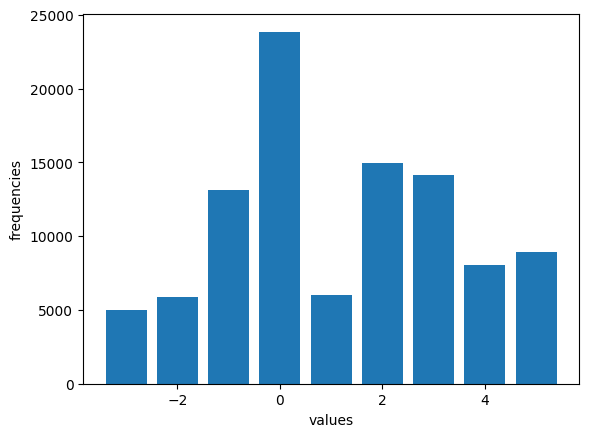

In [57]:
plt.bar(values, frequencies)
plt.xlabel('values')
plt.ylabel('frequencies')

> В случае непрерывной случайной величины такой метод не подойдет, так как каджое величина в выборке вообще говоря может быть уникальной. Поэтому для оценки моды непрерывной случайной величины следует воспользоваться гистограммой, как это будет рассмотренно ниже, для оценки моды логнормального распределения.

### Медиана

Для статистической оценки медианы необходимо в первую очередь упорядочить выборку по возрастанию. Если число элементов выборки нечётное, то нужно выбрать элемент, расположенный ровно по середине упорядоченной выборки. Если же число элементов четное, то следует выбрать два центральных элемента и взять от них среднее.

In [58]:
def get_median(sample):
    ordered = np.sort(sample, kind='mergesort')
    n = len(ordered)
    if n % 2 == 0:
        median = ordered[int(n/2)]
    else:
        median = ordered[int(np.ceil(n/2))]
    return median

get_median(sample_discrete)

1

## Логнормальное распределение

Для того, чтобы экспериментально вычислить статистические характеристики непрерывной случайной величины, рассмотрим выборку, получаемую из **логнормального распределения** (*Log-normal distribution*), плотность вероятности которого представляет собой функцию:
$$
f(x) = \frac{1}{x \sigma \sqrt{2\pi}} e^{-\frac{(\ln x -\mu)^2}{2 \sigma^2}}
$$
где $x>0, \; \sigma > 0, \; \mu \in \mathbb R$.

Text(0, 0.5, 'PDF')

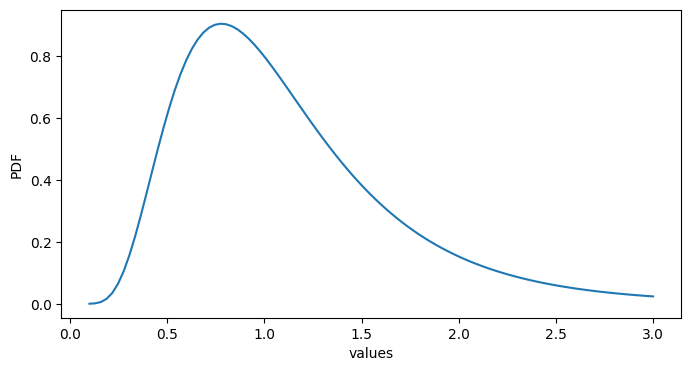

In [ ]:
def lognormal(x, mu=0., sigma=0.5):
    result = np.zeros_like(x)
    for i in range(len(x)):
        denominator = (x[i] * sigma * np.sqrt(2 * np.pi))
        numerator = np.exp(-((np.log(x[i]) - mu)**2) / (2 * sigma**2))
        result[i] = numerator / denominator
    return result

space = np.linspace(0.1, 3, 100).astype(np.float32)
p = lognormal(space)
plt.figure(figsize=(8, 4))
plt.plot(space, p)
plt.xlabel('values')
plt.ylabel('PDF')

Сгенерируем данные по логнормальному распределению:

In [ ]:
data = np.random.lognormal(mean=0., sigma=0.5, size=1000)

### Ядерная оценка плотности (KDE)

Если известна функция распределения, для вычисления моды достаточно найти максимум плотности распределения. Преположим, что нам неизвестна функция, по которой мы сгенерировади данные. Для экспериментального вычисления моды непрерывной случайной величины, попробуем смоделировать ее плотность вероятности, которая будет представлять собой сглаженую гистограмму. Воспользуемся **ядерной оценкой плотности** (*Kernel Density Estimation* - KDE) для получения сглаженной гистограммы:
$$
\hat{f}_h(x) = \frac{1}{n} \sum_{i=1}^n K_h(x-x_i)
$$
Здесь $K_h(u) = \frac{1}{h} K(\frac{u}{h}) $, где $K$ - **Гауссово ядро** (*gaussian kernel*):

$$
K(t) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2}t^2}
$$
$h > 0$ является сглаживающим параметром, называемым **шириной полосы** (*bandwidth*).

In [ ]:
def gaussian_kernel(x):
    return np.exp(-(x**2) / 2) / np.sqrt(2 * np.pi)

def gaussian_kernel_h(x, h):
    return gaussian_kernel(x/h) / h

def get_kde(x, data, kernel, h=0.1):
    s = np.sum(kernel(data - x, h))
    return s / len(data)

Визуализируем гистограмму и ядерную оценку плотности (KDE).

Text(0.5, 1.0, 'Kernel density estimate')

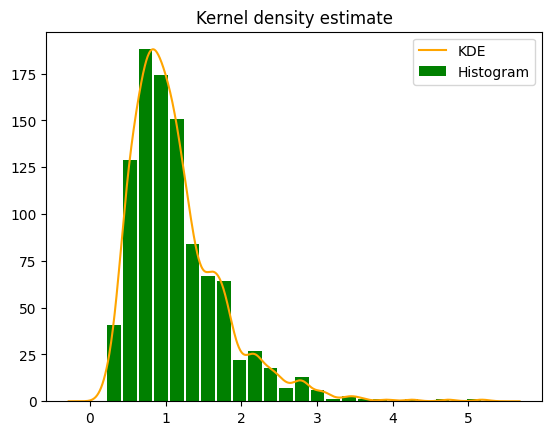

In [ ]:
space = np.linspace(data.min()-0.5, data.max()+0.5, 1000)
kde = np.zeros(len(space))
for i in range(len(space)):
    kde[i] = get_kde(space[i], data, gaussian_kernel_h)

hist, bins = np.histogram(data, bins=24)
scaler =  hist.max() / kde.max()

# plt.hist(data, bins=bins, label="Histogram")
x = bins[1:]-(bins[1]-bins[0])/2
plt.bar(x, hist, width=.18, color='green', label="Histogram")
plt.plot(space, kde*scaler, color='orange', label='KDE')
plt.legend()
plt.title("Kernel density estimate")

### Оценка моды, среднего и медианы

Остается вычислить значение $x$ которому соответствует максимальное значение KDE. Это и будет экспериментальным значением **моды**.

In [ ]:
index = np.argmax(kde)
space[index]

0.8344520624249796

Напишем функцию, которая таким способом вычисляет моду по заданной выборке:

In [ ]:
def get_mode(sample):
    space = np.linspace(data.min()-0.5, data.max()+0.5, 1000)
    kde = np.zeros(len(space))
    for i in range(len(space)):
        kde[i] = get_kde(space[i], data, gaussian_kernel_h)
    index = np.argmax(kde)
    return space[index]

mode = get_mode(data)
mode

0.8344520624249796

Вычислим теперь **математическое ожидание** (экспериментально, оно представляет собой просто среднее арифметическое):

In [ ]:
mean = data.mean()
mean

1.142153886419791

Вычислим **медиану**:

In [ ]:
median = get_median(data)
median

1.0007883203816432

In [ ]:
mode, mean, median

(0.8344520624249796, 1.142153886419791, 1.0007883203816432)

In [ ]:
mode_kde = get_kde(mode, data, gaussian_kernel_h)
mean_kde = get_kde(mean, data, gaussian_kernel_h)
median_kde = get_kde(median, data, gaussian_kernel_h)

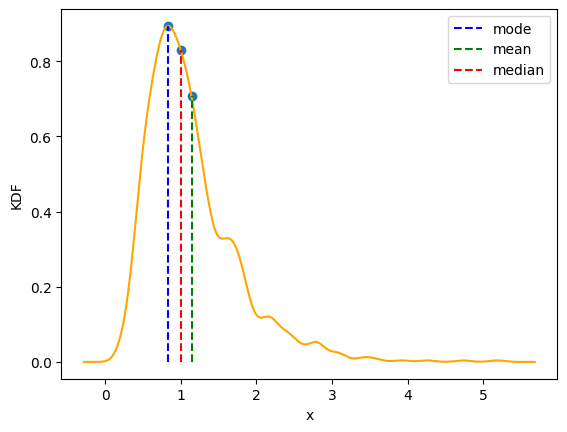

In [ ]:
plt.plot(space, kde, color='orange')
plt.scatter((mode, mean, median), (mode_kde, mean_kde, median_kde))
plt.plot((mode, mode), (0, mode_kde), 'b--', label="mode")
plt.plot((mean, mean), (0, mean_kde), 'g--', label="mean")
plt.plot((median, median), (0, median_kde), 'r--', label="median")
plt.xlabel("x")
plt.ylabel("KDF")
plt.legend()

### Оценка дисперсии и стандартного отклонения

Воспользуемся функцией `get_var()`, которую мы определили для экспериментальной оценки дисперсии.

In [ ]:
variance = get_var(data)
std = np.sqrt(variance)

variance, std

(0.3716568170959871, 0.6096366270951796)

Дисперсию и стандартное отклонение также можно вычислить при помощи функций `var()` и `std()` из библиотеки NumPy, либо при помощи одноименных методов массива (объекта класса `ndarray`).

In [ ]:
np.var(data), np.std(data)

(0.3716568170959874, 0.6096366270951799)

In [ ]:
data.var(), data.std()

(0.3716568170959874, 0.6096366270951799)